**Problem Statement**

In this project we will build a model how many user buy a product or how many user not buy a product.

In [62]:
from google.colab import files
uploaded = files.upload()


Saving user_visit_duration.csv to user_visit_duration (2).csv


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
import io
data = pd.read_csv(io.BytesIO(uploaded['user_visit_duration.csv']))

In [65]:
data.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


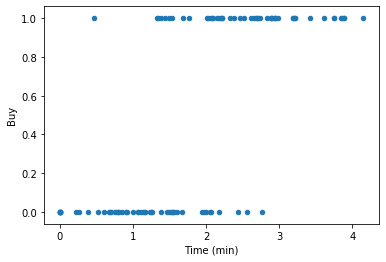

In [66]:
data.plot(kind = 'scatter', x='Time (min)', y='Buy')

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

In [0]:
model = Sequential()

In [0]:
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

In [0]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [71]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
x = data['Time (min)'].values
y = data['Buy'].values

In [73]:
model.fit(x,y, epochs=25)

Epoch 1/25
100/100 [==============================] - 0s 3ms/step - loss: 0.7403 - acc: 0.5100
Epoch 2/25
100/100 [==============================] - 0s 130us/step - loss: 0.6272 - acc: 0.5300
Epoch 3/25
100/100 [==============================] - 0s 90us/step - loss: 0.5989 - acc: 0.6700
Epoch 4/25
100/100 [==============================] - 0s 70us/step - loss: 0.5606 - acc: 0.7700
Epoch 5/25
100/100 [==============================] - 0s 73us/step - loss: 0.5357 - acc: 0.7500
Epoch 6/25
100/100 [==============================] - 0s 72us/step - loss: 0.5440 - acc: 0.7300
Epoch 7/25
100/100 [==============================] - 0s 80us/step - loss: 0.5230 - acc: 0.7800
Epoch 8/25
100/100 [==============================] - 0s 109us/step - loss: 0.4874 - acc: 0.7700
Epoch 9/25
100/100 [==============================] - 0s 96us/step - loss: 0.5082 - acc: 0.7500
Epoch 10/25
100/100 [==============================] - 0s 94us/step - loss: 0.4670 - acc: 0.8100
Epoch 11/25
100/100 [=================

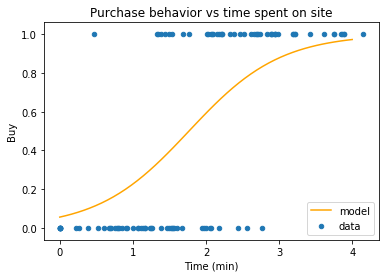

In [74]:
ax = data.plot(kind='scatter', x='Time (min)', y='Buy',
               title = 'Purchase behavior vs time spent on site')

temp = np.linspace(0,4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [0]:
temp_class = model.predict(temp) > 0.5

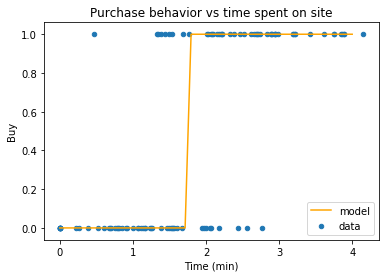

In [76]:
ax = data.plot(kind='scatter', x='Time (min)', y='Buy',
               title = 'Purchase behavior vs time spent on site')

temp = np.linspace(0,4)
ax.plot(temp, temp_class, color='orange')
plt.legend(['model', 'data'])

In [0]:
y_pred = model.predict(x)
y_class_pred = y_pred > 0.5

In [0]:
from sklearn.metrics import accuracy_score

In [79]:
print("The accuracy is:\t{:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy is:	0.820


**Train Test Split**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [0]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [83]:
model.fit(x_train, y_train, epochs=25, verbose=0)

In [84]:
print("The Train accuracy Score is:\t{:0.3f}".format(accuracy_score(y_train, model.predict(x_train) > 0.5)))
print("The Test accuracy Score is:\t{:0.3f}".format(accuracy_score(y_test, model.predict(x_test) > 0.5)))

The Train accuracy Score is:	0.838
The Test accuracy Score is:	0.850


**Cross Validation**

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier

In [0]:
def build_logistic_regression_model():
  model = Sequential()
  model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
  model.compile(SGD(lr=0.5),
                'binary_crossentropy',
                metrics=['accuracy'])
  return model

In [0]:
model = KerasClassifier(build_fn=build_logistic_regression_model, epochs=25, verbose=0)


In [0]:
from sklearn.model_selection import cross_val_score, KFold

In [0]:
cv = KFold(3, shuffle=True)
scores = cross_val_score(model, x, y, cv=cv)

In [90]:
scores

array([0.82352941, 0.78787879, 0.90909091])

In [91]:
print("The cross validation accuracy is {:0.4f} + {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.8402 + 0.0509


**Confusion Matrix**

In [0]:
from sklearn.metrics import confusion_matrix

In [93]:
confusion_matrix(y, y_class_pred)

array([[41,  9],
       [ 9, 41]])

In [0]:
def pretty_confustion_matrix(y_true, y_pred, labels=["False", "True"]):
  cm = confusion_matrix(y_true, y_pred)
  pred_labels = ['Predicted' + l for l in labels]
  df = pd.DataFrame(cm, index=labels, columns=pred_labels)
  return df

In [95]:
pretty_confustion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

,PredictedNot Buy,PredictedBuy
Not Buy,41,9
Buy,9,41


In [0]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [97]:
print("Precision:\t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall:\t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))

Precision:	0.820
Recall:	0.820
F1 Score:	0.820


In [0]:
from sklearn.metrics import classification_report

In [99]:
print(classification_report(y, y_class_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        50
           1       0.82      0.82      0.82        50

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



**Great Job Shivan!**